In [1]:
#loosely based on Dogs vs Cat Redux & lesson1

In [2]:
#cd ~/fastai/data/
#wget http://files.fast.ai/data/dogscats.zip
#unzip dogscats.zip
#cd dogstcats

In [7]:
from __future__ import division,print_function
import os, sys
os.chdir("/home/ubuntu/fastai/")
print("current dir:", os.getcwd() )
#import modules
from utils import *
from vgg16 import Vgg16

from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

#Instantiate plotting tool
#In Jupyter notebooks, you will need to run this command before doing any plotting
%matplotlib inline

current dir: /home/ubuntu/fastai


In [90]:
#Create references to important directories we will use over and over
DATA_HOME_DIR = "/home/ubuntu/fastai/data/dogscats/"
os.chdir(DATA_HOME_DIR)
print("current dir:", os.getcwd() )

#Set path to sample/ path if desired
test_path = DATA_HOME_DIR + 'test1/' #We use all the test data
results_path=DATA_HOME_DIR + 'results/'
train_path=DATA_HOME_DIR + 'train/'
valid_path=DATA_HOME_DIR + 'valid/'
print ("test_path:", test_path)
print ("results_path:", results_path)
print ("train_path:", train_path)
print ("valid_path:", valid_path)

current dir: /home/ubuntu/fastai/data/dogscats
test_path: /home/ubuntu/fastai/data/dogscats/test1/
results_path: /home/ubuntu/fastai/data/dogscats/results/
train_path: /home/ubuntu/fastai/data/dogscats/train/
valid_path: /home/ubuntu/fastai/data/dogscats/valid/


In [9]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=64


In [ ]:
vgg = Vgg16()

In [13]:
#create small batch and plot some examples
smallbatches = vgg.get_batches(train_path, batch_size=4)

Found 23000 images belonging to 2 classes.


In [15]:
imgs,labels = next(smallbatches)
print ("imgs:", type(imgs), ims.shape)
print ("labels:", type(labels), labels.shape)

imgs: <type 'numpy.ndarray'>
labels: <type 'numpy.ndarray'>


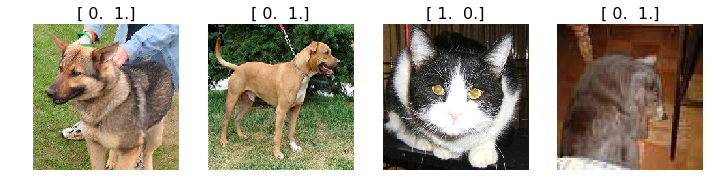

In [16]:
plots(imgs, titles=labels)

imgs: <type 'numpy.ndarray'> (4, 3, 224, 224)
labels: <type 'numpy.ndarray'> (4, 3, 224, 224)


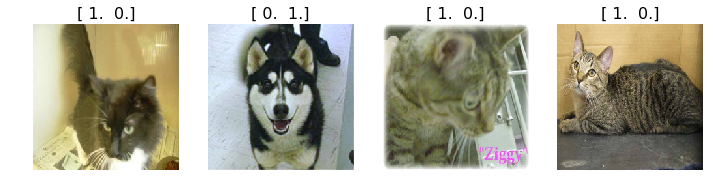

In [20]:
imgs,labels = next(smallbatches)
print ("imgs:", type(imgs), imgs.shape)
print ("labels:", type(labels), imgs.shape)
plots(imgs, titles=labels)

In [21]:
vgg.predict(imgs, True)

(array([ 1.    ,  0.9989,  1.    ,  1.    ], dtype=float32),
 array([0, 1, 0, 0]),
 ['cats', 'dogs', 'cats', 'cats'])

imgs: <type 'numpy.ndarray'> (4, 3, 224, 224)
labels: <type 'numpy.ndarray'> (4, 3, 224, 224)


(array([ 1.,  1.,  1.,  1.], dtype=float32),
 array([1, 1, 0, 1]),
 ['dogs', 'dogs', 'cats', 'dogs'])

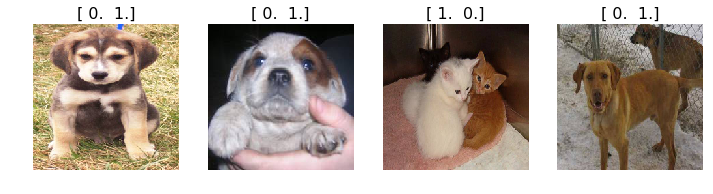

In [22]:
imgs,labels = next(smallbatches)
print ("imgs:", type(imgs), imgs.shape)
print ("labels:", type(labels), imgs.shape)
plots(imgs, titles=labels)
vgg.predict(imgs, True)

In [10]:
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
print ("start, DATA_HOME_DIR:", DATA_HOME_DIR)
batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/1
23000/23000 [==============================] - 607s - loss: 0.1195 - acc: 0.9681 - val_loss: 0.0796 - val_acc: 0.9780


In [ ]:
#refer dogs_cata_redux for moving files around if using download from kaggle.
#download from files.fast.ai already has this done.

In [ ]:
#nb: need to create results directory.
# mkdir results
#test directory is named test1 in the files.fast.ai upzipped structure

In [26]:
#import Vgg16 helper class
vgg = Vgg16()

In [27]:
#Set constants. You can experiment with no_of_epochs to improve the model
batch_size=64
no_of_epochs=3

In [28]:
#Finetune the model
print ("start")
batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size*2)
vgg.finetune(batches)

#Not sure if we set this for all fits
vgg.model.optimizer.lr = 0.01

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [33]:
#Notice we are passing in the validation dataset to the fit() method
#For each epoch we test our model against the validation set
latest_weights_filename = None
for epoch in range(no_of_epochs):
    print ("Running epoch: %d" % epoch)
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'ft%d.h5' % epoch
    vgg.model.save_weights(results_path+latest_weights_filename)
print ("Completed %s fit operations" % no_of_epochs)

Running epoch: 0
Epoch 1/1
23000/23000 [==============================] - 607s - loss: 0.3619 - acc: 0.9701 - val_loss: 0.2396 - val_acc: 0.9820
Running epoch: 1
Epoch 1/1
23000/23000 [==============================] - 606s - loss: 0.3581 - acc: 0.9737 - val_loss: 0.2824 - val_acc: 0.9790
Running epoch: 2
Epoch 1/1
23000/23000 [==============================] - 605s - loss: 0.3343 - acc: 0.9767 - val_loss: 0.2748 - val_acc: 0.9810
Completed 3 fit operations


In [78]:
print ("start")
batches, preds = vgg.test(test_path, batch_size = batch_size*2)

start
Found 12500 images belonging to 1 classes.


In [76]:
#For every image, vgg.test() generates two probabilities 
#based on how we've ordered the cats/dogs directories.
#It looks like column one is cats and column two is dogs
print ("preds:\n", preds[:5])

filenames = batches.filenames
print (filenames[:5])

preds:
 [[ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]]
['unknown/2957.jpg', 'unknown/11706.jpg', 'unknown/10629.jpg', 'unknown/9810.jpg', 'unknown/9834.jpg']


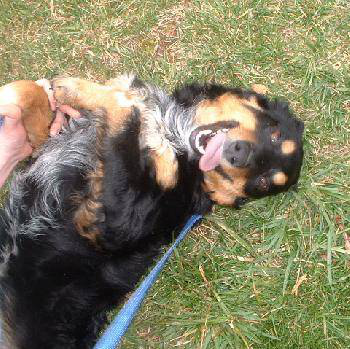

In [77]:
#You can verify the column ordering by viewing some images
from PIL import Image
Image.open(test_path + filenames[2])

In [43]:
print (type(vgg))

<type 'instance'>


In [44]:
#don't need this as model still has weights from above?
#print ("latest_weights_filename:", latest_weights_filename)
#vgg.model.load_weights(results_path+latest_weights_filename)

latest_weights_filename: ft2.h5


In [46]:
val_batches, probs = vgg.test(valid_path, batch_size = batch_size)


Found 2000 images belonging to 2 classes.


In [47]:
print ("val_batches:", type(val_batches))
print ("probs:", type(probs))

val_batches: <class 'keras.preprocessing.image.DirectoryIterator'>
probs: <type 'numpy.ndarray'>


In [48]:
filenames = val_batches.filenames
expected_labels = val_batches.classes #0 or 1

#Round our predictions to 0/1 to generate labels
our_predictions = probs[:,0]
our_labels = np.round(1-our_predictions)
#NB: later we adjust this method to 0.05 and 0.95 for better scoring in kaggle

In [49]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + filenames[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

In [52]:
#1. A few correct labels at random
correct = np.where(our_labels==expected_labels)[0]
print ("Found %d correct labels" % len(correct))


Found 1964 correct labels


In [54]:
#2. A few incorrect labels at random
incorrect = np.where(our_labels!=expected_labels)[0]
print ("Found %d incorrect labels" % len(incorrect))

Found 36 incorrect labels


In [55]:
#3a. The images we most confident were cats, and are actually cats
correct_cats = np.where((our_labels==0) & (our_labels==expected_labels))[0]
print ("Found %d confident correct cats labels" % len(correct_cats))

Found 988 confident correct cats labels


In [58]:
#3b. The images we most confident were dogs, and are actually dogs
correct_dogs = np.where((our_labels==1) & (our_labels==expected_labels))[0]
print ("Found %d confident correct dogs labels" % len(correct_dogs))

Found 976 confident correct dogs labels


In [60]:
#4a. The images we were most confident were cats, but are actually dogs
incorrect_cats = np.where((our_labels==0) & (our_labels!=expected_labels))[0]
print ("Found %d incorrect cats" % len(incorrect_cats))

Found 24 incorrect cats


In [62]:
#4b. The images we were most confident were dogs, but are actually cats
incorrect_dogs = np.where((our_labels==1) & (our_labels!=expected_labels))[0]
print ("Found %d incorrect dogs" % len(incorrect_dogs))


Found 12 incorrect dogs


[1502 1366 1365 1364 1363 1362 1361 1360 1359 1358]
<type 'numpy.ndarray'> (2000,)
[1197  562 1121 1765]
[ 0.8327  0.1382  0.9792  0.0201]


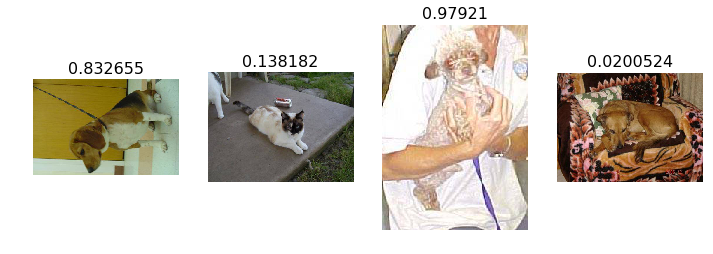

In [70]:
#5. The most uncertain labels (ie those with probability closest to 0.5).
print (np.argsort(our_predictions)[0:10])
most_uncertain = np.argsort(np.abs(our_predictions-0.5))
print(type(most_uncertain), most_uncertain.shape)
print (most_uncertain[0:n_view])
print (our_predictions[most_uncertain[0:n_view]])
plots_idx(most_uncertain[:n_view], our_predictions[most_uncertain])

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_labels)

[[988  12]
 [ 24 976]]


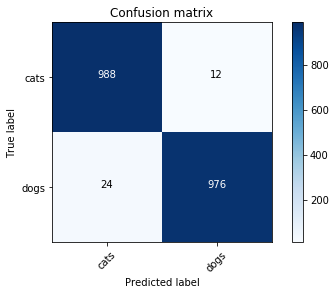

In [72]:
plot_confusion_matrix(cm, val_batches.class_indices)

In [79]:
print (preds[0:10])

[[ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]]


In [80]:
#Grab the dog prediction column
isdog = preds[:,1]

In [81]:
print (isdog[0:10])

[ 0.  1.  1.  0.  0.  1.  0.  0.  1.  1.]


In [82]:
#So to play it safe, we use a sneaky trick to round down our edge predictions
#Swap all ones with .95 and all zeros with .05
isdog = isdog.clip(min=0.05, max=0.95)

In [83]:
print (isdog[0:10])

[ 0.05  0.95  0.95  0.05  0.05  0.95  0.05  0.05  0.95  0.95]


In [85]:
#Extract imageIds from the filenames in our test/unknown directory 
filenames = batches.filenames
ids = np.array([int(f[8:f.find('.')]) for f in filenames])
print (ids[0:10])

[ 2957 11706 10629  9810  9834  5308  2850  6998  6901  7008]


In [86]:
subm = np.stack([ids,isdog], axis=1)
subm[:5]

array([[  2.9570e+03,   5.0000e-02],
       [  1.1706e+04,   9.5000e-01],
       [  1.0629e+04,   9.5000e-01],
       [  9.8100e+03,   5.0000e-02],
       [  9.8340e+03,   5.0000e-02]])

In [88]:
submission_file_name = 'submission1.csv'
print ("submission_file_name:", submission_file_name)
np.savetxt(results_path+submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')

submission_file_name: submission1.csv


In [89]:
from IPython.display import FileLink
%cd $results_path
FileLink(submission_file_name)

/home/ubuntu/fastai/data/dogscats/results


/home/ubuntu/fastai/data/dogscats/results/submission1.csv